In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


In [2]:
df = pd.read_csv(r"C:\Users\tom_r\Downloads\e87857a2-9e4a-41d1-a6cc-33ad22c17f90.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3625 entries, 0 to 3624
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             3625 non-null   object 
 1   Start            3625 non-null   object 
 2   End              2621 non-null   object 
 3   Duration         2675 non-null   object 
 4   Start Condition  1238 non-null   object 
 5   Start Location   1911 non-null   object 
 6   End Condition    2180 non-null   object 
 7   Notes            0 non-null      float64
dtypes: float64(1), object(7)
memory usage: 226.7+ KB


In [4]:
df.head()

,Type,Start,End,Duration,Start Condition,Start Location,End Condition,Notes
0,Feed,2025-06-30 13:18,NaN,NaN,Formula,Bottle,100ml,NaN
1,Feed,2025-06-30 10:57,NaN,NaN,Formula,Bottle,90ml,NaN
2,Sleep,2025-06-30 10:57,2025-06-30 12:33,01:35,NaN,NaN,NaN,NaN
3,Feed,2025-06-30 09:58,NaN,NaN,Formula,Bottle,180ml,NaN
4,Sleep,2025-06-30 07:29,2025-06-30 08:54,01:24,NaN,NaN,NaN,NaN


## Project Aims

Explore the trend over time for:
- Average day nap duration
- Breast Feeding Duration
- Formula amount
- Night time wakes
- Night time sleep duration

In [5]:
# seperate sleep into seperate df
sleeps = df[df['Type'] == 'Sleep'].reset_index(drop=True)

# drop unnused data columns
sleeps = sleeps[['Type', 'Start', 'End', 'Duration']]

In [6]:
sleeps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      1205 non-null   object
 1   Start     1205 non-null   object
 2   End       1205 non-null   object
 3   Duration  1205 non-null   object
dtypes: object(4)
memory usage: 37.8+ KB


In [7]:
sleeps

,Type,Start,End,Duration
0,Sleep,2025-06-30 10:57,2025-06-30 12:33,01:35
1,Sleep,2025-06-30 07:29,2025-06-30 08:54,01:24
2,Sleep,2025-06-29 19:16,2025-06-30 04:57,09:40
3,Sleep,2025-06-29 15:51,2025-06-29 16:39,00:48
4,Sleep,2025-06-29 11:26,2025-06-29 13:20,01:54
...,...,...,...,...
1200,Sleep,2025-02-16 17:00,2025-02-16 21:00,04:00
1201,Sleep,2025-02-16 14:00,2025-02-16 16:22,02:21
1202,Sleep,2025-02-16 11:00,2025-02-16 13:00,02:00
1203,Sleep,2025-02-16 02:00,2025-02-16 06:00,04:00


In [8]:
# Change data types

sleeps['Type'] = sleeps['Type'].astype('category')
sleeps['Start'] = pd.to_datetime(sleeps['Start'], format='%Y-%m-%d %H:%M')
sleeps['End'] = pd.to_datetime(sleeps['End'], format='%Y-%m-%d %H:%M')
sleeps['Duration'] = sleeps['Duration'] + ':00'
sleeps['Duration'] = pd.to_timedelta(sleeps['Duration'])

In [9]:
sleeps

,Type,Start,End,Duration
0,Sleep,2025-06-30 10:57:00,2025-06-30 12:33:00,0 days 01:35:00
1,Sleep,2025-06-30 07:29:00,2025-06-30 08:54:00,0 days 01:24:00
2,Sleep,2025-06-29 19:16:00,2025-06-30 04:57:00,0 days 09:40:00
3,Sleep,2025-06-29 15:51:00,2025-06-29 16:39:00,0 days 00:48:00
4,Sleep,2025-06-29 11:26:00,2025-06-29 13:20:00,0 days 01:54:00
...,...,...,...,...
1200,Sleep,2025-02-16 17:00:00,2025-02-16 21:00:00,0 days 04:00:00
1201,Sleep,2025-02-16 14:00:00,2025-02-16 16:22:00,0 days 02:21:00
1202,Sleep,2025-02-16 11:00:00,2025-02-16 13:00:00,0 days 02:00:00
1203,Sleep,2025-02-16 02:00:00,2025-02-16 06:00:00,0 days 04:00:00


In [10]:
# Total daily time napping over time

# Seperate day and night
# Group by day
# Sum Duration
# Plot


In [11]:
# seperate day and night
sleeps['day/night'] = ['Day' if start.hour > 6 and start.hour < 18 else 'Night' for start in sleeps['Start']]
sleeps

,Type,Start,End,Duration,day/night
0,Sleep,2025-06-30 10:57:00,2025-06-30 12:33:00,0 days 01:35:00,Day
1,Sleep,2025-06-30 07:29:00,2025-06-30 08:54:00,0 days 01:24:00,Day
2,Sleep,2025-06-29 19:16:00,2025-06-30 04:57:00,0 days 09:40:00,Night
3,Sleep,2025-06-29 15:51:00,2025-06-29 16:39:00,0 days 00:48:00,Day
4,Sleep,2025-06-29 11:26:00,2025-06-29 13:20:00,0 days 01:54:00,Day
...,...,...,...,...,...
1200,Sleep,2025-02-16 17:00:00,2025-02-16 21:00:00,0 days 04:00:00,Day
1201,Sleep,2025-02-16 14:00:00,2025-02-16 16:22:00,0 days 02:21:00,Day
1202,Sleep,2025-02-16 11:00:00,2025-02-16 13:00:00,0 days 02:00:00,Day
1203,Sleep,2025-02-16 02:00:00,2025-02-16 06:00:00,0 days 04:00:00,Night


In [12]:
day_sleeps = sleeps[sleeps['day/night'] == 'Day']

In [13]:
day_sleeps

,Type,Start,End,Duration,day/night
0,Sleep,2025-06-30 10:57:00,2025-06-30 12:33:00,0 days 01:35:00,Day
1,Sleep,2025-06-30 07:29:00,2025-06-30 08:54:00,0 days 01:24:00,Day
3,Sleep,2025-06-29 15:51:00,2025-06-29 16:39:00,0 days 00:48:00,Day
4,Sleep,2025-06-29 11:26:00,2025-06-29 13:20:00,0 days 01:54:00,Day
5,Sleep,2025-06-29 07:27:00,2025-06-29 09:16:00,0 days 01:49:00,Day
...,...,...,...,...,...
1195,Sleep,2025-02-17 12:28:00,2025-02-17 13:34:00,0 days 01:06:00,Day
1196,Sleep,2025-02-17 09:32:00,2025-02-17 11:59:00,0 days 02:27:00,Day
1200,Sleep,2025-02-16 17:00:00,2025-02-16 21:00:00,0 days 04:00:00,Day
1201,Sleep,2025-02-16 14:00:00,2025-02-16 16:22:00,0 days 02:21:00,Day


In [14]:
grouped_day_sleeps = day_sleeps['Duration'].groupby(by=day_sleeps['Start'].dt.date).sum()

In [15]:
grouped_day_sleeps

Start
2025-02-16   0 days 08:21:00
2025-02-17   0 days 06:15:00
2025-02-18   0 days 05:40:00
2025-02-19   0 days 05:53:00
2025-02-20   0 days 03:53:00
                   ...      
2025-06-26   0 days 01:58:00
2025-06-27   0 days 04:30:00
2025-06-28   0 days 03:37:00
2025-06-29   0 days 04:31:00
2025-06-30   0 days 02:59:00
Name: Duration, Length: 132, dtype: timedelta64[ns]

In [16]:
grouped_day_sleeps = grouped_day_sleeps.reset_index(name='Total_Day_Sleep')

In [17]:
grouped_day_sleeps.head(20)

,Start,Total_Day_Sleep
0,2025-02-16,0 days 08:21:00
1,2025-02-17,0 days 06:15:00
2,2025-02-18,0 days 05:40:00
3,2025-02-19,0 days 05:53:00
4,2025-02-20,0 days 03:53:00
5,2025-02-21,0 days 06:28:00
6,2025-02-22,0 days 04:15:00
7,2025-02-23,0 days 05:40:00
8,2025-02-24,0 days 06:18:00
9,2025-02-25,0 days 05:41:00


In [18]:
grouped_day_sleeps['Duration_Minutes'] = grouped_day_sleeps['Total_Day_Sleep'] / pd.Timedelta(minutes=1)
grouped_day_sleeps['Duration_Hours'] = grouped_day_sleeps['Total_Day_Sleep'] / pd.Timedelta(hours=1)
grouped_day_sleeps


,Start,Total_Day_Sleep,Duration_Minutes,Duration_Hours
0,2025-02-16,0 days 08:21:00,501.0,8.350000
1,2025-02-17,0 days 06:15:00,375.0,6.250000
2,2025-02-18,0 days 05:40:00,340.0,5.666667
3,2025-02-19,0 days 05:53:00,353.0,5.883333
4,2025-02-20,0 days 03:53:00,233.0,3.883333
...,...,...,...,...
127,2025-06-26,0 days 01:58:00,118.0,1.966667
128,2025-06-27,0 days 04:30:00,270.0,4.500000
129,2025-06-28,0 days 03:37:00,217.0,3.616667
130,2025-06-29,0 days 04:31:00,271.0,4.516667


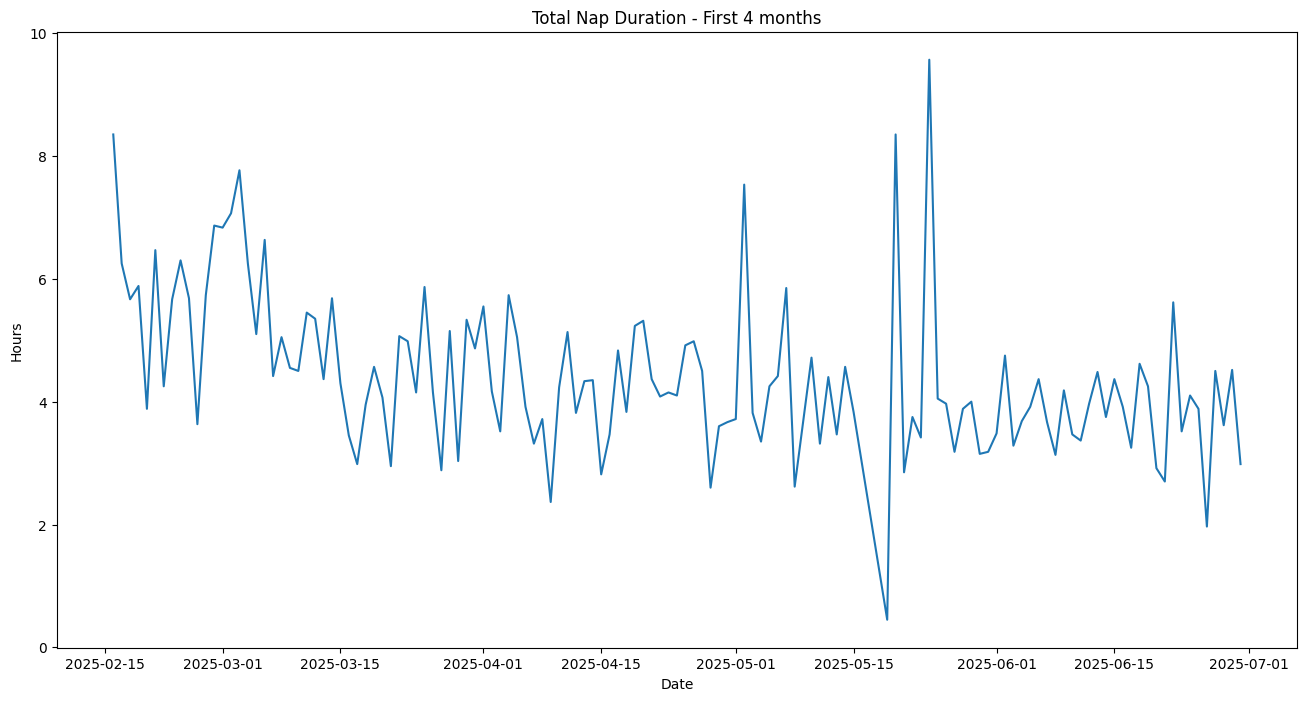

In [19]:
plt.figure(figsize=(16,8))
plt.plot(grouped_day_sleeps['Start'], grouped_day_sleeps['Duration_Hours'])
plt.xlabel("Date")
plt.ylabel("Hours")
plt.title("Total Nap Duration - First 4 months")

plt.show()

In [20]:
# Night plot 

In [21]:
night_sleeps = sleeps[sleeps['day/night'] == 'Night']


In [22]:
# if night and time less that 0600 then date is the day before

night_sleeps['Sleep start date'] = [start if start.hour > 18 else start - timedelta(days=1) for start in night_sleeps['Start']]
night_sleeps

C:\Users\tom_r\AppData\Local\Temp\ipykernel_20232\4104114010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night_sleeps['Sleep start date'] = [start if start.hour > 18 else start - timedelta(days=1) for start in night_sleeps['Start']]


,Type,Start,End,Duration,day/night,Sleep start date
2,Sleep,2025-06-29 19:16:00,2025-06-30 04:57:00,0 days 09:40:00,Night,2025-06-29 19:16:00
6,Sleep,2025-06-28 18:21:00,2025-06-29 05:39:00,0 days 11:17:00,Night,2025-06-27 18:21:00
10,Sleep,2025-06-27 19:38:00,2025-06-28 05:36:00,0 days 09:58:00,Night,2025-06-27 19:38:00
14,Sleep,2025-06-26 23:46:00,2025-06-27 05:23:00,0 days 05:36:00,Night,2025-06-26 23:46:00
15,Sleep,2025-06-26 20:03:00,2025-06-26 23:25:00,0 days 03:22:00,Night,2025-06-26 20:03:00
...,...,...,...,...,...,...
1197,Sleep,2025-02-17 06:58:00,2025-02-17 08:30:00,0 days 01:31:00,Night,2025-02-16 06:58:00
1198,Sleep,2025-02-17 03:15:00,2025-02-17 06:05:00,0 days 02:49:00,Night,2025-02-16 03:15:00
1199,Sleep,2025-02-16 22:20:00,2025-02-17 01:38:00,0 days 03:18:00,Night,2025-02-16 22:20:00
1203,Sleep,2025-02-16 02:00:00,2025-02-16 06:00:00,0 days 04:00:00,Night,2025-02-15 02:00:00


In [25]:
test= night_sleeps[night_sleeps['Start'] == '2025-06-27']
test

,Type,Start,End,Duration,day/night,Sleep start date


In [26]:
grouped_night_sleeps = night_sleeps['Duration'].groupby(by=night_sleeps['Sleep start date'].dt.date).sum()
grouped_night_sleeps

Sleep start date
2025-02-15   0 days 07:00:00
2025-02-16   0 days 08:44:00
2025-02-17   0 days 10:32:00
2025-02-18   0 days 07:58:00
2025-02-19   0 days 08:39:00
                   ...      
2025-06-24   0 days 18:22:00
2025-06-25   0 days 01:44:00
2025-06-26   0 days 08:58:00
2025-06-27   0 days 21:15:00
2025-06-29   0 days 09:40:00
Name: Duration, Length: 130, dtype: timedelta64[ns]

In [27]:
grouped_night_sleeps = night_sleeps['Duration'].groupby(by=night_sleeps['Sleep start date'].dt.date).sum()
grouped_night_sleeps = grouped_night_sleeps.reset_index(name='Total_Night_Sleep')
grouped_night_sleeps['Duration_Minutes'] = grouped_night_sleeps['Total_Night_Sleep'] / pd.Timedelta(minutes=1)
grouped_night_sleeps['Duration_Hours'] = grouped_night_sleeps['Total_Night_Sleep'] / pd.Timedelta(hours=1)

In [28]:
night_sleeps[['Start', 'End', 'Sleep start date']]


,Start,End,Sleep start date
2,2025-06-29 19:16:00,2025-06-30 04:57:00,2025-06-29 19:16:00
6,2025-06-28 18:21:00,2025-06-29 05:39:00,2025-06-27 18:21:00
10,2025-06-27 19:38:00,2025-06-28 05:36:00,2025-06-27 19:38:00
14,2025-06-26 23:46:00,2025-06-27 05:23:00,2025-06-26 23:46:00
15,2025-06-26 20:03:00,2025-06-26 23:25:00,2025-06-26 20:03:00
...,...,...,...
1197,2025-02-17 06:58:00,2025-02-17 08:30:00,2025-02-16 06:58:00
1198,2025-02-17 03:15:00,2025-02-17 06:05:00,2025-02-16 03:15:00
1199,2025-02-16 22:20:00,2025-02-17 01:38:00,2025-02-16 22:20:00
1203,2025-02-16 02:00:00,2025-02-16 06:00:00,2025-02-15 02:00:00


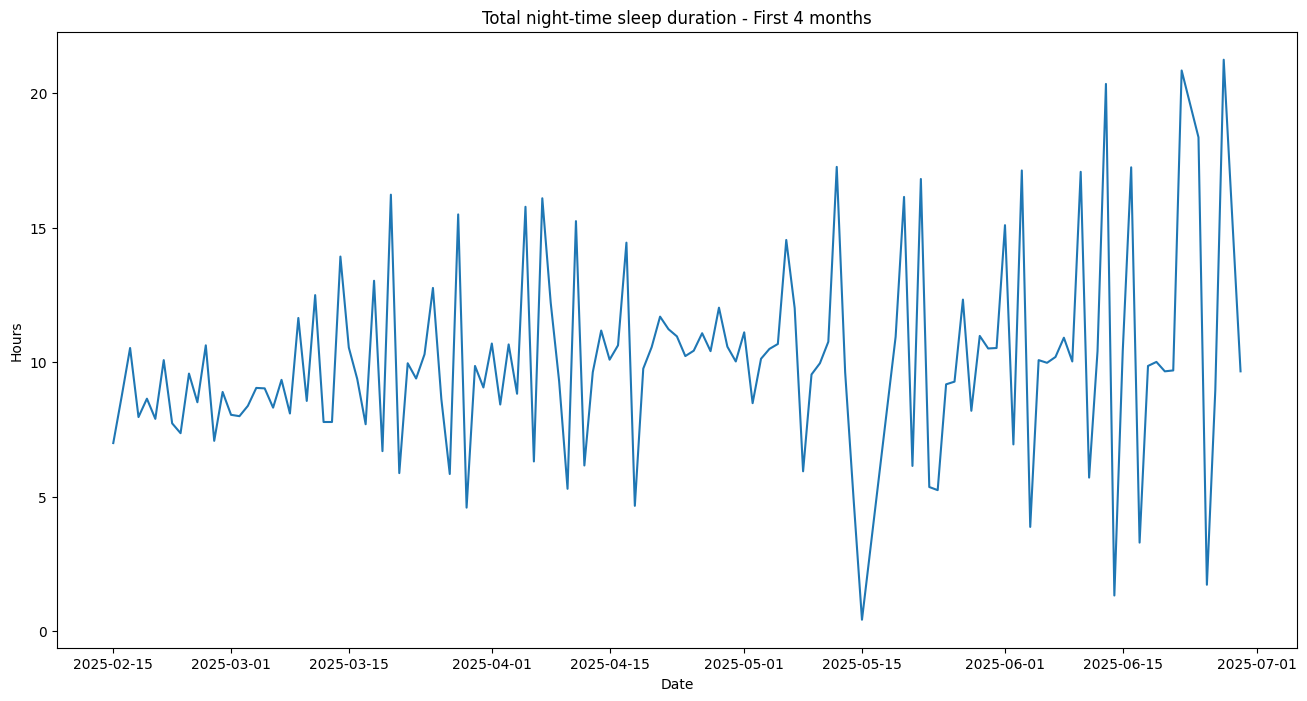

In [29]:
plt.figure(figsize=(16,8))
plt.plot(grouped_night_sleeps['Sleep start date'], grouped_night_sleeps['Duration_Hours'])
plt.xlabel("Date")
plt.ylabel("Hours")
plt.title("Total night-time sleep duration - First 4 months")

plt.show()